In [ ]:
import plotly.express as px
from pathlib import Path
from windrose import WindroseAxes
import pandas as pd
import numpy as np
import matplotlib as mpl
import calendar as cal

In [ ]:
datadir = Path().absolute().parent / "evaluation/working"
windfp = datadir / "wind_ANC_PANC_1980_2019_4km.csv"
windDF = pd.read_csv(windfp, index_col = 'Time', parse_dates = ['Time'])
windDF['wspd10'] = 2.23694 * windDF['wspd10']          # m/s to mph
windDF

,wspd10,wdir10
Time,,
1980-01-01 00:00:00,5.292600,33.937
1980-01-01 01:00:00,5.563270,40.343
1980-01-01 02:00:00,5.616956,34.303
1980-01-01 03:00:00,5.142725,30.125
1980-01-01 04:00:00,5.221018,24.972
...,...,...
2019-12-31 19:00:00,19.322688,138.628
2019-12-31 20:00:00,20.561952,142.351
2019-12-31 21:00:00,20.559716,141.267


In [ ]:
wind_onemonth = windDF[windDF.index.month == 9]
wind_onemonth

,wspd10,wdir10
Time,,
1980-09-01 00:00:00,4.299399,27.662
1980-09-01 01:00:00,3.001973,45.950
1980-09-01 02:00:00,2.136278,113.134
1980-09-01 03:00:00,5.534190,178.118
1980-09-01 04:00:00,5.668406,186.007
...,...,...
2019-09-30 19:00:00,3.872143,23.381
2019-09-30 20:00:00,4.948111,22.193
2019-09-30 21:00:00,6.956883,3.924


Text(0.5, 1.0, 'ERA5, 4 km, Anchorage, September winds')

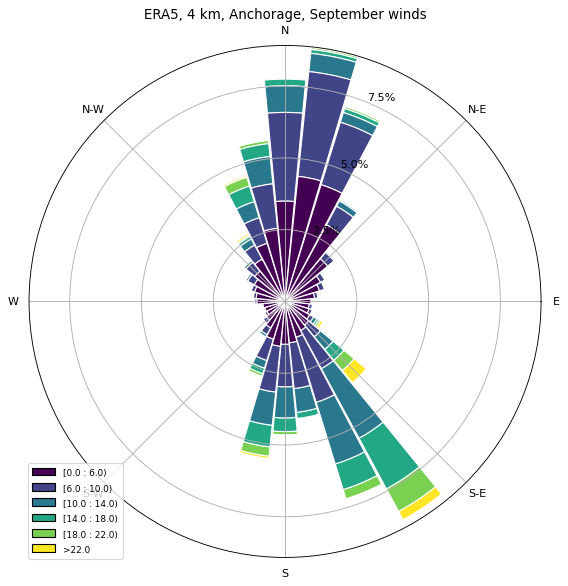

In [ ]:
ax = WindroseAxes.from_ax()
ax.bar(wind_onemonth.wdir10, wind_onemonth.wspd10, normed=True, 
    bins=[0, 6, 10, 14, 18, 22], nsector=32,
    opening=0.95, edgecolor="white")
largesttick = ax.get_yticks()[-1]
largesttick = 2.5 * (1 + np.floor(largesttick / 2.5) )
ax.set_yticks(np.arange(2.5, largesttick, step=2.5))
ax.set_yticklabels([f"{percentage}%" for percentage in np.arange(2.5, largesttick, step=2.5)],
    horizontalalignment='left')

ax.set_legend()
ax.set_title("ERA5, 4 km, Anchorage, September winds")

In [ ]:
2.5 * (2 + np.floor(12.90994624 / 2.5) )

17.5